### Compare different epsilon values in explore-exploit for multi-armed bandit with 3 bandits using optimistic mean values method

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from optimistic_initial_values import Bandit
from epsilon_greedy import Bandit as BanditEps

In [2]:
def run_3_bandit_experiment(mean1,mean2,mean3,epsilon=0.1,N=10,optimistic_initial_value = 10):
    bandits = [Bandit(mean1,initial_mean = optimistic_initial_value),Bandit(mean2,initial_mean = optimistic_initial_value),Bandit(mean3,initial_mean = optimistic_initial_value)]
    
    rewards = np.empty(N)
    
    for i in range(N):
        bandit_to_pull = np.argmax([bandit.estimate_mean for bandit in bandits])
        x = bandits[bandit_to_pull].pull()
        bandits[bandit_to_pull].update(x)
        rewards[i] =x
        
    cumulative_average_reward = np.cumsum(rewards)/(np.arange(N)+1)
    
    plt.plot(cumulative_average_reward)
    plt.plot(np.ones(N)*mean1) 
    plt.plot(np.ones(N)*mean2)
    plt.plot(np.ones(N)*mean3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print("Real mean:",b.mean, "Estimated mean:",b.estimate_mean)
        
    return cumulative_average_reward

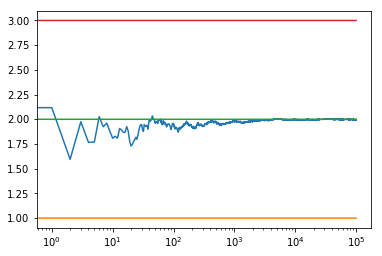

Real mean: 1.0 Estimated mean: 1.7733714159216638
Real mean: 2.0 Estimated mean: 1.9945922721088303
Real mean: 3.0 Estimated mean: 0.550376902669452


In [3]:
cumulative_5 =  run_3_bandit_experiment(1.0,2.0,3.0,0.5,N=100000,optimistic_initial_value=10)

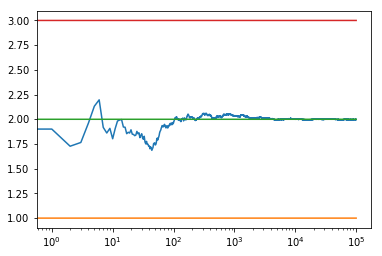

Real mean: 1.0 Estimated mean: 1.455734115342107
Real mean: 2.0 Estimated mean: 1.9977581848916919
Real mean: 3.0 Estimated mean: 1.3805298745561383


In [4]:
cumulative_1 = run_3_bandit_experiment(1.0,2.0,3.0,0.1,N=100000,optimistic_initial_value=10)

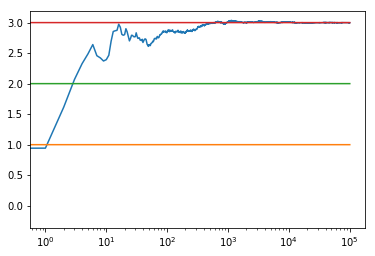

Real mean: 1.0 Estimated mean: -0.20320949742131766
Real mean: 2.0 Estimated mean: 2.0895915803459735
Real mean: 3.0 Estimated mean: 2.99788296462715


In [5]:
cumulative_05  = run_3_bandit_experiment(1.0,2.0,3.0,0.05,N=100000,optimistic_initial_value=10)

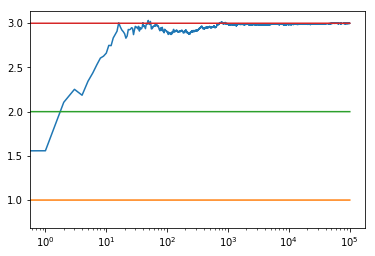

Real mean: 1.0 Estimated mean: 0.7957493286994652
Real mean: 2.0 Estimated mean: 2.3194973271767325
Real mean: 3.0 Estimated mean: 2.998708415787747


In [6]:
cumulative_01 = run_3_bandit_experiment(1.0,2.0,3.0,0.01,N=100000,optimistic_initial_value=10)

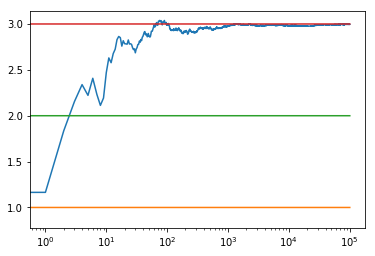

Real mean: 1.0 Estimated mean: 0.8839236942035478
Real mean: 2.0 Estimated mean: 1.4455123922743827
Real mean: 3.0 Estimated mean: 2.9966316938010307


In [7]:
cumulative_001 = run_3_bandit_experiment(1.0,2.0,3.0,0.001,N=100000,optimistic_initial_value=10)

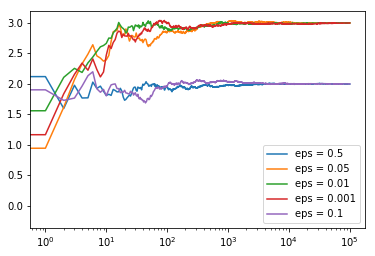

In [8]:
plt.plot(cumulative_5,label="eps = 0.5")
plt.plot(cumulative_05,label="eps = 0.05")
plt.plot(cumulative_01,label ="eps = 0.01")
plt.plot(cumulative_001,label="eps = 0.001")
plt.plot(cumulative_1,label ="eps = 0.1")

plt.legend()
plt.xscale('log')
plt.show()

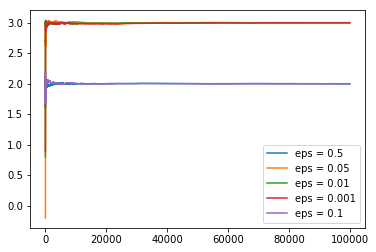

In [9]:
plt.plot(cumulative_5,label="eps = 0.5")
plt.plot(cumulative_05,label="eps = 0.05")
plt.plot(cumulative_01,label ="eps = 0.01")
plt.plot(cumulative_001,label="eps = 0.001")
plt.plot(cumulative_1,label ="eps = 0.1")

plt.legend()
plt.show()

#### Compare epsilon-greedy to optimistic initial values

In [10]:
def run_3_bandit_experiment_eps(mean1,mean2,mean3,epsilon=0.1,N=10):
    bandits = [BanditEps(mean1),BanditEps(mean2),BanditEps(mean3)]
    
    rewards = np.empty(N)
    
    for i in range(N):
        # epsilon-greedy: explore with a probability of epsilon, exploit with a probability 1-epsilon
        explore_prob = np.random.random()
        
        # select the bandit to pull by deciding between explore/exploit
        if explore_prob <= epsilon: #explore
            bandit_to_pull = np.random.choice(3)
        else: #exploit the best bandit(using the estimated mean reward rate)
            bandit_to_pull = np.argmax([bandit.estimate_mean for bandit in bandits]) 
            
        x = bandits[bandit_to_pull].pull() #pull the selected bandit and get a reward
        bandits[bandit_to_pull].update(x) #update the estimate mean of selected bandit
        
        rewards[i] = x
        
    #for plotting: moving average (the average total reward in every step)
    cumulative_average_reward  = np.cumsum(rewards) / (np.arange(N)+1)
    
    plt.plot(cumulative_average_reward)
    plt.plot(np.ones(N)*mean1) 
    plt.plot(np.ones(N)*mean2)
    plt.plot(np.ones(N)*mean3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print("Real mean:",b.mean, "Estimated mean:",b.estimate_mean)
        
    return cumulative_average_reward

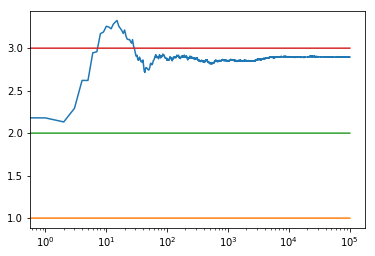

Real mean: 1.0 Estimated mean: 0.978807190524824
Real mean: 2.0 Estimated mean: 1.966625527059142
Real mean: 3.0 Estimated mean: 2.996686344109979


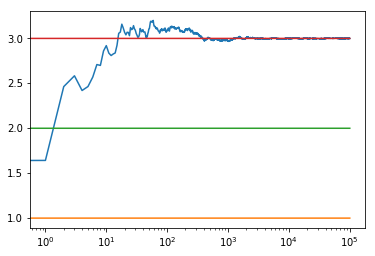

Real mean: 1.0 Estimated mean: 1.030232011348976
Real mean: 2.0 Estimated mean: 2.2540731395171147
Real mean: 3.0 Estimated mean: 3.000027610547589


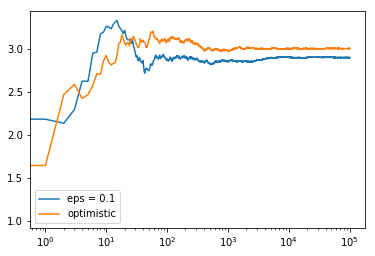

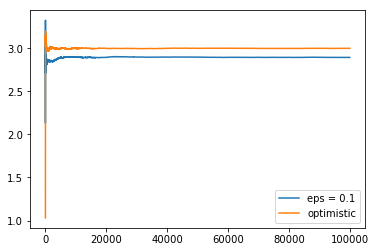

In [11]:
c_1 = run_3_bandit_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
oiv = run_3_bandit_experiment(1.0,2.0,3.0,0.1,N=100000,optimistic_initial_value=10)

  # log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.xscale('log')
plt.show()


  # linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.show()

## Conclusion
Optimistic initial values outperforms epsilon greedy in short and long terms